In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

**EDA**

In [1]:
# Define file paths for School A
file_path_all_course = '/content/sample_data/School A/all_course_cleaned.xlsx'
file_path_remarketing = '/content/sample_data/School A/remarketing_cleaned.xlsx'
file_path_summer_only = '/content/sample_data/School A/summer_only_cleaned.xlsx'
data_a ='/content/sample_data/School A/total_marketing_effects.xlsx'

# Define file paths for School B
file_path_highschool = '/content/sample_data/School B/highschool_cleaned.xlsx'
file_path_main = '/content/sample_data/School B/main_cleaned.xlsx'
file_path_others = '/content/sample_data/School B/others_cleaned.xlsx'
data_b = '/content/sample_data/School B/total_marketing_effects_B.xlsx'


# Load and clean data for School A
A_all_course = pd.read_excel(file_path_all_course)
A_remarketing = pd.read_excel(file_path_remarketing)
A_summer_only = pd.read_excel(file_path_summer_only)
data_a = pd.read_excel(data_a)

# Load and clean data for School B
B_highschool = pd.read_excel(file_path_highschool)
B_main = pd.read_excel(file_path_main)
B_others = pd.read_excel(file_path_others)
data_b = pd.read_excel(data_b)
# Display the first few rows of each DataFrame to ensure they are loaded and cleaned correctly
print("Data for School A - All Course:")
print(A_all_course.head())

print("\nData for School A - Remarketing:")
print(A_remarketing.head())

print("\nData for School A - Summer Only:")
print(A_summer_only.head())

print("\nData for School B - High School:")
print(B_highschool.head())

print("\nData for School B - Main:")
print(B_main.head())

print("\nData for School B - Others:")
print(B_others.head())


NameError: name 'pd' is not defined

# School A

In [3]:
A_all_course.head()

,Campaign,Campaign state,Campaign type,Week,Clicks,Impr.,CTR,Currency code,Avg. CPC,Cost,Impr. (Abs. Top) %,Conversions,Cost / conv.,Conv. rate,Budget
0,All Courses,Enabled,Search,2022-10-17,360,2881,0.1250,GBP,1.29,464.06,0.4665,1.0,464.06,0.0028,65
1,All Courses,Enabled,Search,2022-10-24,485,3174,0.1528,GBP,0.94,457.97,0.4458,11.0,41.63,0.0227,65
2,All Courses,Enabled,Search,2022-10-31,500,4120,0.1214,GBP,0.92,460.76,0.4250,4.0,115.19,0.0080,65
3,All Courses,Enabled,Search,2022-11-07,508,3962,0.1282,GBP,0.95,481.64,0.4036,13.0,37.05,0.0256,65
4,All Courses,Enabled,Search,2022-11-14,413,2802,0.1474,GBP,1.04,431.26,0.3876,3.0,143.75,0.0073,65


In [4]:
A_summer_only.head()

,Campaign,Campaign state,Campaign type,Week,Clicks,Impr.,CTR,Currency code,Avg. CPC,Cost,Impr. (Abs. Top) %,Conversions,Cost / conv.,Conv. rate,Budget
0,Summer Only,Paused,Search,2022-12-12,97,456,0.2127,GBP,0.86,83.00,0.2561,4,20.75,0.0412,16
1,Summer Only,Paused,Search,2022-12-19,137,869,0.1577,GBP,0.64,87.10,0.1684,2,43.55,0.0146,16
2,Summer Only,Paused,Search,2022-12-26,188,1018,0.1847,GBP,0.68,127.29,0.2342,0,0.00,0.0000,16
3,Summer Only,Paused,Search,2023-01-02,196,1300,0.1508,GBP,0.59,116.57,0.1919,4,29.14,0.0204,16
4,Summer Only,Paused,Search,2023-01-09,244,1421,0.1717,GBP,0.47,115.65,0.1503,2,57.83,0.0082,16


In [5]:
A_remarketing.head()

,Campaign,Campaign state,Campaign type,Week,Currency code,Budget,Clicks,Impr.,CTR,Avg. CPC,Cost,Conversions,Cost / conv.,Conv. rate
0,Re-Marketing,Paused,Display,2023-04-24,GBP,5,42,4934,0.0085,0.05,1.96,0,0.00,0.0000
1,Re-Marketing,Paused,Display,2023-05-01,GBP,5,157,52227,0.0030,0.08,12.83,3,4.28,0.0191
2,Re-Marketing,Paused,Display,2023-05-08,GBP,5,10,6360,0.0016,0.54,5.42,0,0.00,0.0000
3,Re-Marketing,Paused,Display,2023-05-15,GBP,5,12,8039,0.0015,0.97,11.61,0,0.00,0.0000
4,Re-Marketing,Paused,Display,2023-05-22,GBP,5,17,6447,0.0026,2.06,35.01,0,0.00,0.0000


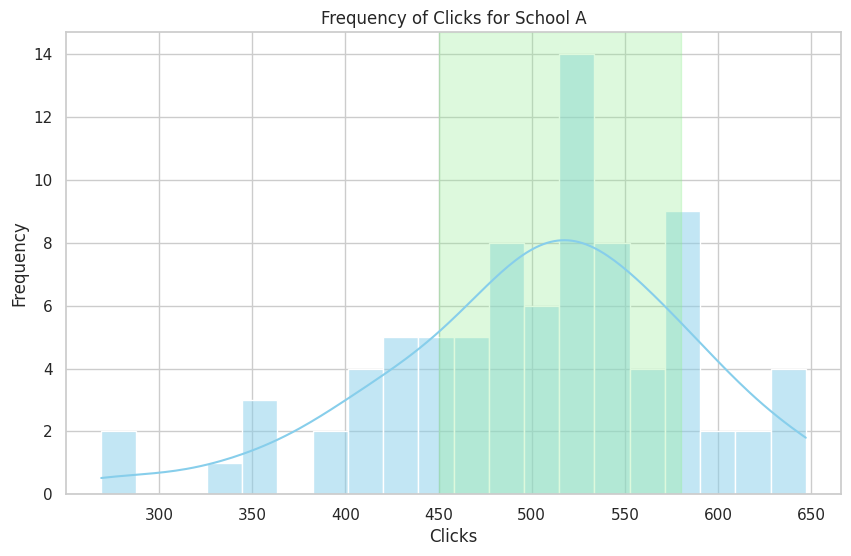

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the frequency of clicks with a highlighted area for the most frequent range
plt.figure(figsize=(10, 6))
sns.histplot(data_a['Clicks'], bins=20, kde=True, color='skyblue')

# Highlight the most frequent range
plt.axvspan(450, 580, color='lightgreen', alpha=0.3)  # Example range, adjust based on your data

plt.title('Frequency of Clicks for School A')
plt.xlabel('Clicks')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

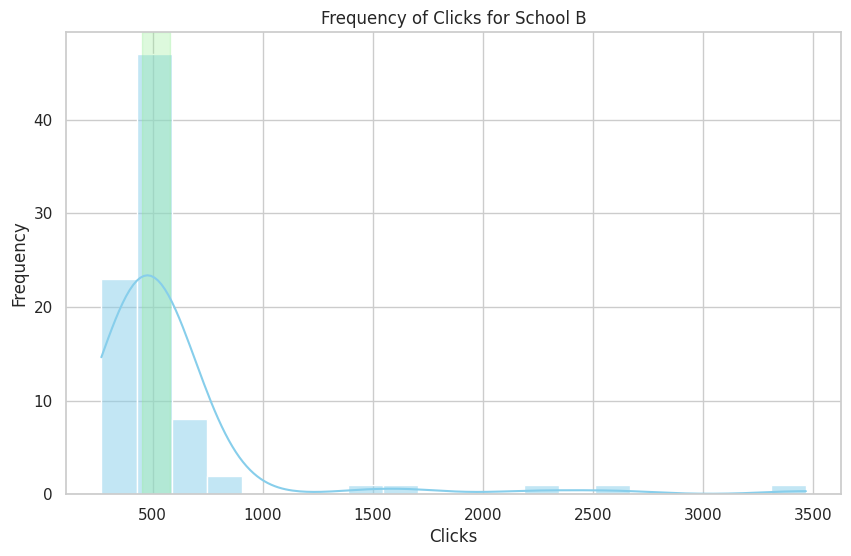

In [28]:
# Plot the frequency of clicks with a highlighted area for the most frequent range
plt.figure(figsize=(10, 6))
sns.histplot(data_b['Clicks'], bins=20, kde=True, color='skyblue')

# Highlight the most frequent range
plt.axvspan(450, 580, color='lightgreen', alpha=0.3)  # Example range, adjust based on your data

plt.title('Frequency of Clicks for School B')
plt.xlabel('Clicks')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

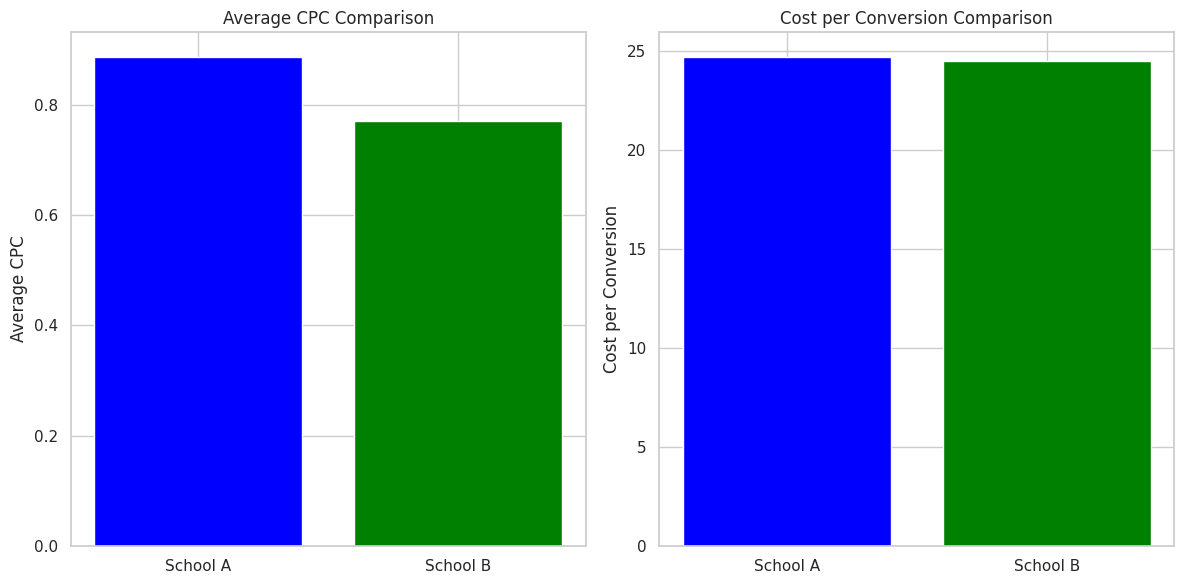

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data for School A and School B
# (assuming data_a and data_b are already loaded DataFrames)

# Compute the average CPC and Cost per Conversion for School A
average_cpc_a = data_a['Cost'].sum()/data_a['Clicks'].sum()
total_cost_a = data_a['Cost'].sum()
total_conversions_a = data_a['Conversions'].sum()
average_cost_per_conv_a = total_cost_a / total_conversions_a

# Compute the average CPC and Cost per Conversion for School B
average_cpc_b = data_b['Cost'].sum()/data_b['Clicks'].sum()
total_cost_b = data_b['Cost'].sum()
total_conversions_b = data_b['Conversions'].sum()
average_cost_per_conv_b = total_cost_b / total_conversions_b

# Create a DataFrame for plotting
comparison_data = pd.DataFrame({
    'School': ['School A', 'School B'],
    'Average CPC': [average_cpc_a, average_cpc_b],
    'Cost per Conversion': [average_cost_per_conv_a, average_cost_per_conv_b]
})

# Plot the comparison bar chart
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot Average CPC
ax[0].bar(comparison_data['School'], comparison_data['Average CPC'], color=['blue', 'green'])
ax[0].set_title('Average CPC Comparison')
ax[0].set_ylabel('Average CPC')

# Plot Cost per Conversion
ax[1].bar(comparison_data['School'], comparison_data['Cost per Conversion'], color=['blue', 'green'])
ax[1].set_title('Cost per Conversion Comparison')
ax[1].set_ylabel('Cost per Conversion')

# Display the plots
plt.tight_layout()
plt.show()


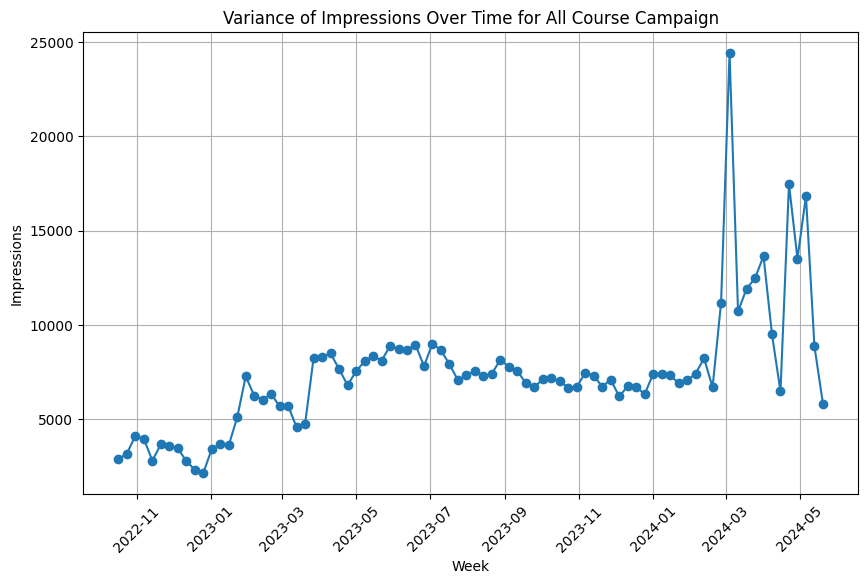

In [7]:
# Plot the variance of impressions over time
plt.figure(figsize=(10, 6))
plt.plot(A_all_course['Week'], A_all_course['Impr.'], marker='o')
plt.title('Variance of Impressions Over Time for All Course Campaign')
plt.xlabel('Week')
plt.ylabel('Impressions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

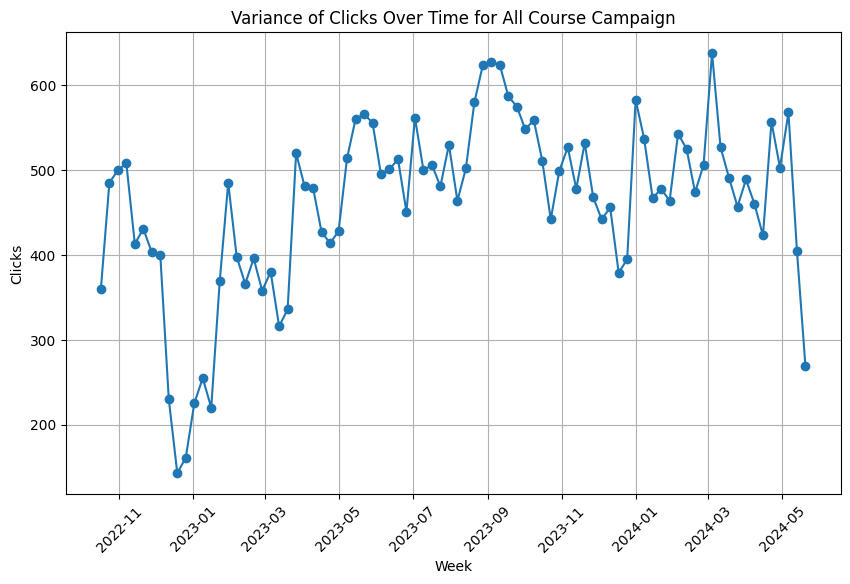

In [8]:
# Plot the variance of clicks over time
plt.figure(figsize=(10, 6))
plt.plot(A_all_course['Week'], A_all_course['Clicks'], marker='o')
plt.title('Variance of Clicks Over Time for All Course Campaign')
plt.xlabel('Week')
plt.ylabel('Clicks')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

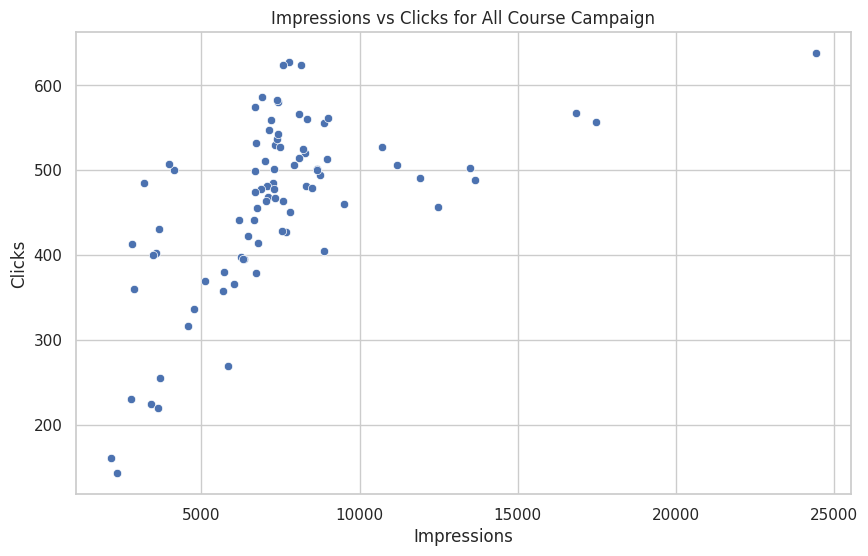

In [33]:
# Scatter plot for impressions vs clicks
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Impr.', y='Clicks', data=A_all_course)
plt.title('Impressions vs Clicks for All Course Campaign')
plt.xlabel('Impressions')
plt.ylabel('Clicks')
plt.grid(True)
plt.show()


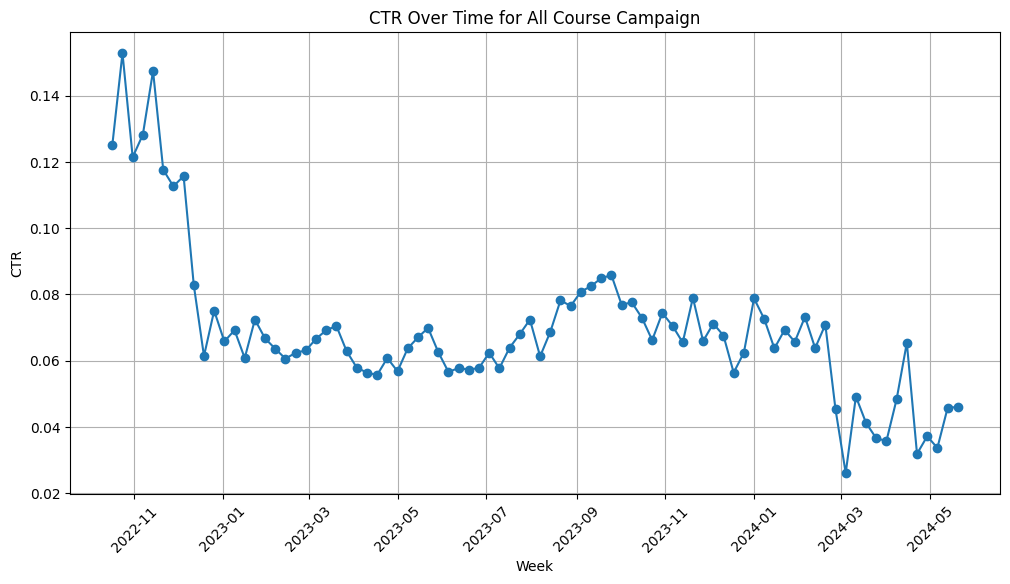

In [10]:
# Line plot of CTR over time
plt.figure(figsize=(12, 6))
plt.plot(A_all_course['Week'], A_all_course['CTR'], marker='o')
plt.title('CTR Over Time for All Course Campaign')
plt.xlabel('Week')
plt.ylabel('CTR')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

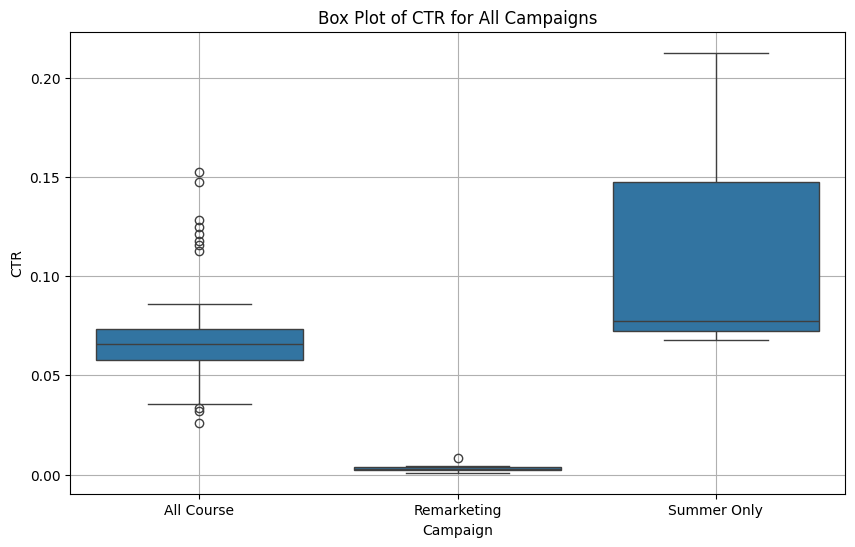

In [11]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

A_all_course['Campaign'] = 'All Course'
A_remarketing['Campaign'] = 'Remarketing'
A_summer_only['Campaign'] = 'Summer Only'

# Combine the three DataFrames
combined_df = pd.concat([A_all_course, A_remarketing, A_summer_only])

# Create the box plot for CTR across the three campaigns
plt.figure(figsize=(10, 6))
sns.boxplot(x='Campaign', y='CTR', data=combined_df)
plt.title('Box Plot of CTR for All Campaigns')
plt.xlabel('Campaign')
plt.ylabel('CTR')
plt.grid(True)
plt.show()


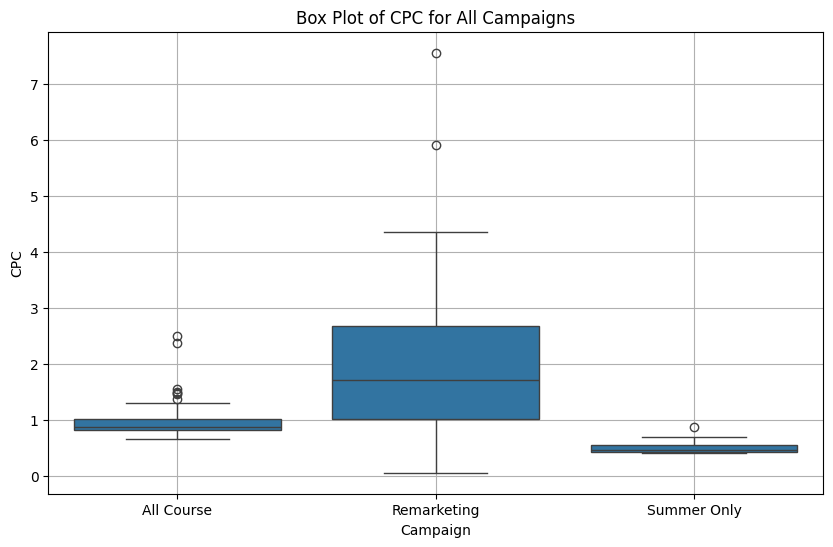

In [12]:
A_all_course['Campaign'] = 'All Course'
A_remarketing['Campaign'] = 'Remarketing'
A_summer_only['Campaign'] = 'Summer Only'

# Combine the three DataFrames
combined_df = pd.concat([A_all_course, A_remarketing, A_summer_only])


# Create the box plot for CPC across the three campaigns
plt.figure(figsize=(10, 6))
sns.boxplot(x='Campaign', y='Avg. CPC', data=combined_df)
plt.title('Box Plot of CPC for All Campaigns')
plt.xlabel('Campaign')
plt.ylabel('CPC')
plt.grid(True)
plt.show()

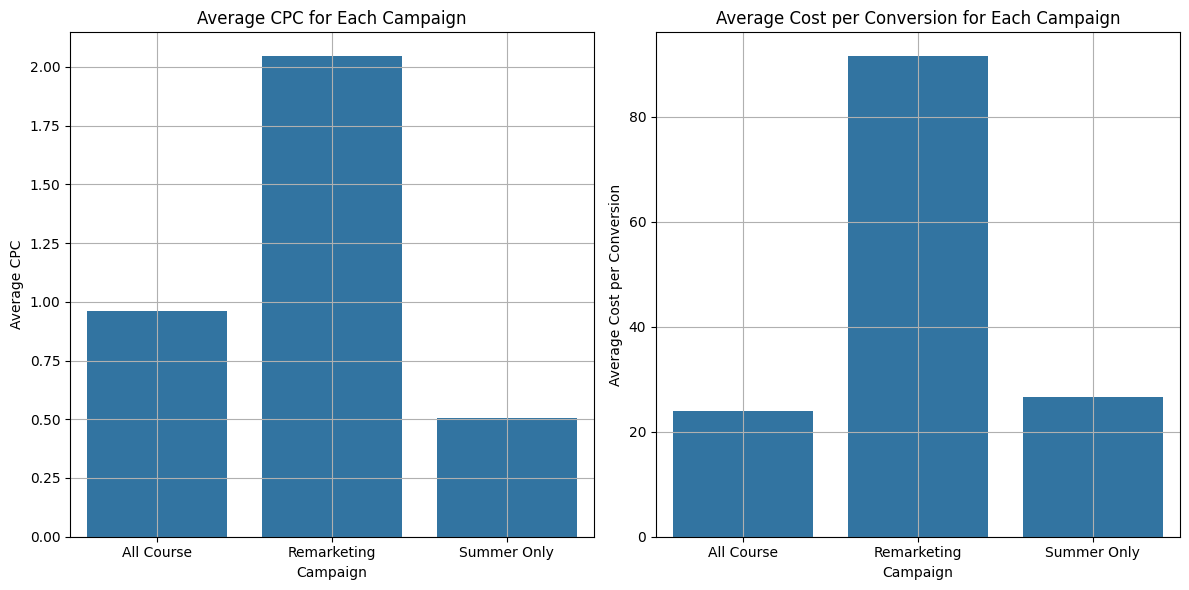

In [13]:
# Aggregate total cost and total conversions for each campaign
total_cost_all_course = A_all_course['Cost'].sum()
total_conversions_all_course = A_all_course['Conversions'].sum()
average_cost_per_conv_all_course = total_cost_all_course / total_conversions_all_course

total_cost_remarketing = A_remarketing['Cost'].sum()
total_conversions_remarketing = A_remarketing['Conversions'].sum()
average_cost_per_conv_remarketing = total_cost_remarketing / (total_conversions_remarketing +6)

total_cost_summer_only = A_summer_only['Cost'].sum()
total_conversions_summer_only = A_summer_only['Conversions'].sum()
average_cost_per_conv_summer_only = total_cost_summer_only / total_conversions_summer_only

# Calculate the average CPC for each campaign
average_cpc_all_course = A_all_course['Avg. CPC'].mean()
average_cpc_remarketing = A_remarketing['Avg. CPC'].mean()
average_cpc_summer_only = A_summer_only['Avg. CPC'].mean()

# Create DataFrames for the average CPC and average Cost per Conversion values
average_metrics = pd.DataFrame({
    'Campaign': ['All Course', 'Remarketing', 'Summer Only'],
    'Average CPC': [average_cpc_all_course, average_cpc_remarketing, average_cpc_summer_only],
    'Average Cost per Conversion': [average_cost_per_conv_all_course, average_cost_per_conv_remarketing, average_cost_per_conv_summer_only]
})

# Plot bar charts for Average CPC and Average Cost per Conversion
plt.figure(figsize=(12, 6))

# Average CPC
plt.subplot(1, 2, 1)
sns.barplot(x='Campaign', y='Average CPC', data=average_metrics)
plt.title('Average CPC for Each Campaign')
plt.xlabel('Campaign')
plt.ylabel('Average CPC')
plt.grid(True)

# Average Cost per Conversion
plt.subplot(1, 2, 2)
sns.barplot(x='Campaign', y='Average Cost per Conversion', data=average_metrics)
plt.title('Average Cost per Conversion for Each Campaign')
plt.xlabel('Campaign')
plt.ylabel('Average Cost per Conversion')
plt.grid(True)

plt.tight_layout()
plt.show()



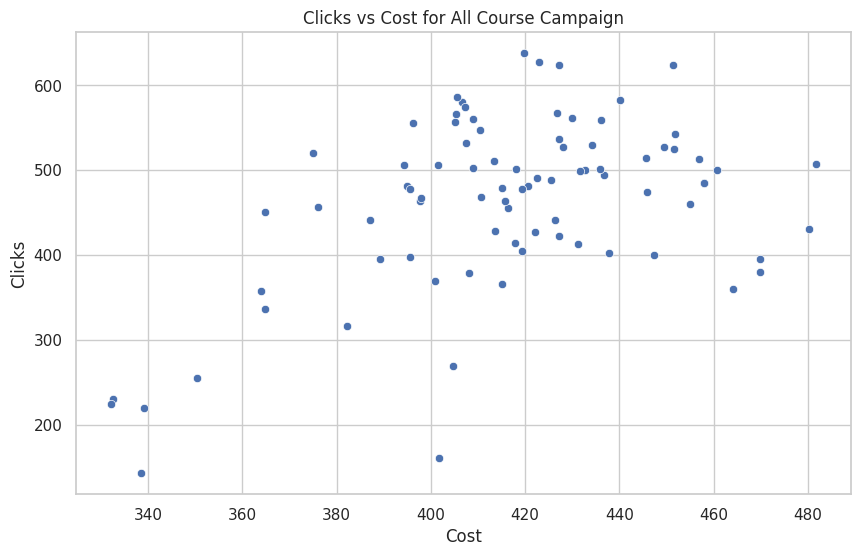

In [45]:

# Scatter plot for clicks vs cost
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cost', y='Clicks', data=A_all_course)
plt.title('Clicks vs Cost for All Course Campaign')
plt.xlabel('Cost')
plt.ylabel('Clicks')
plt.grid(True)
plt.show()



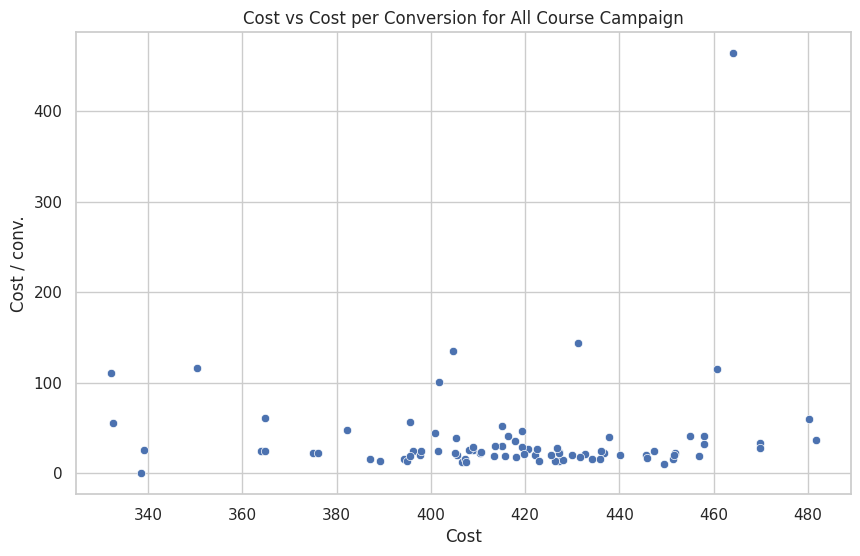

In [15]:
# Set the style for the plots
sns.set(style="whitegrid")

# Plot the scatter plot of Cost vs Cost per Conversion for All Course Campaign
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cost', y='Cost / conv.', data=A_all_course)
plt.title('Cost vs Cost per Conversion for All Course Campaign')
plt.xlabel('Cost')
plt.ylabel('Cost / conv.')
plt.grid(True)
plt.show()

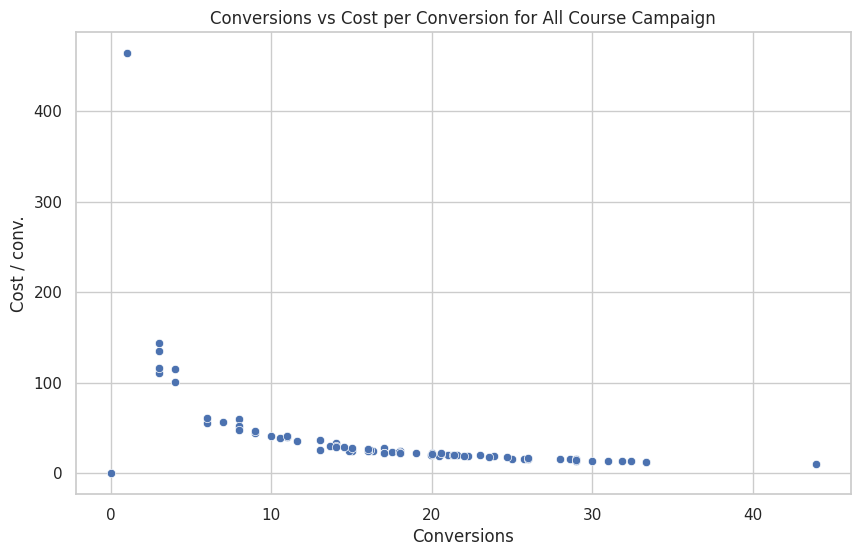

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Plot the scatter plot of Conversions vs Cost per Conversion for All Course Campaign
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Conversions', y='Cost / conv.', data=A_all_course)
plt.title('Conversions vs Cost per Conversion for All Course Campaign')
plt.xlabel('Conversions')
plt.ylabel('Cost / conv.')
plt.grid(True)
plt.show()


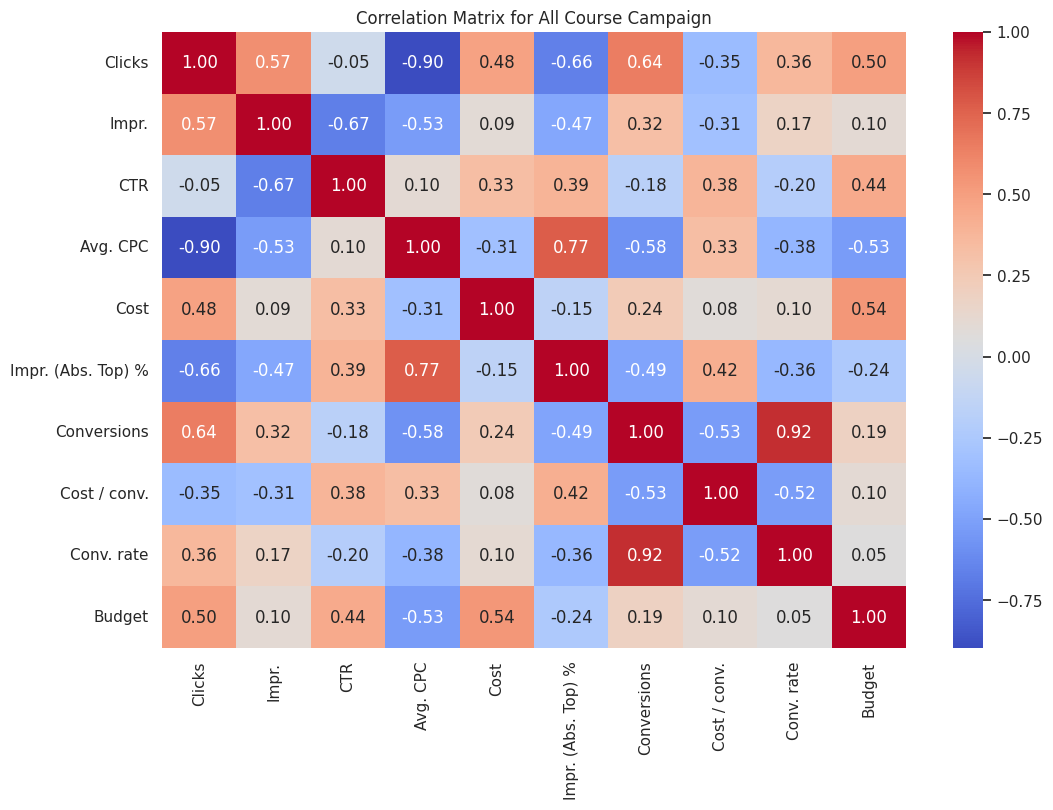

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop irrelevant columns
relevant_columns = A_all_course.drop(['Campaign', 'Campaign state', 'Campaign type', 'Currency code', 'Week'], axis=1)

# Compute the correlation matrix
correlation_matrix = relevant_columns.corr()

# Display the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for All Course Campaign')
plt.show()


School B

In [39]:
B_main.head()


,Campaign,Week,Currency code,Budget,Clicks,Impr.,CTR,Avg. CPC,Cost,Conversions,Cost / conv.,Conv. rate
0,All Courses,2022-10-17,GBP,65,283,3678,0.0769,1.57,443.33,3.0,147.78,0.0106
1,All Courses,2022-10-24,GBP,65,267,3269,0.0817,1.73,463.10,12.0,38.59,0.0449
2,All Courses,2022-10-31,GBP,65,425,4934,0.0861,1.14,483.25,6.0,80.54,0.0141
3,All Courses,2022-11-07,GBP,65,534,5908,0.0904,0.87,465.03,13.0,35.77,0.0243
4,All Courses,2022-11-14,GBP,65,493,5938,0.0830,0.82,401.97,10.0,40.20,0.0203


In [38]:
B_highschool.head()


,Campaign,Week,Currency code,Budget,Clicks,Impr.,CTR,Avg. CPC,Cost,Conversions,Cost / conv.,Conv. rate
0,High School Only,2022-12-12,GBP,16,98,1575,0.0622,0.79,77.79,2.0,38.90,0.0204
1,High School Only,2022-12-19,GBP,16,133,2187,0.0608,0.82,109.40,0.0,0.00,0.0000
2,High School Only,2022-12-26,GBP,16,126,2051,0.0614,0.80,101.26,0.0,0.00,0.0000
3,High School Only,2023-01-02,GBP,16,170,2595,0.0655,0.69,117.04,3.0,39.01,0.0176
4,High School Only,2023-01-09,GBP,16,162,2285,0.0709,0.67,107.92,6.0,17.99,0.0370


In [40]:
B_others.head()

,Campaign,Week,Currency code,Budget,Clicks,Impr.,CTR,Avg. CPC,Cost,Conversions,Cost / conv.,Conv. rate
0,Amber a/b testing Academic English,2024-05-13,GBP,20,262,14435,0.0182,0.31,82.38,1,82.38,0.0038
1,Amber a/b testing Academic English,2024-05-20,GBP,20,580,32699,0.0177,0.24,138.99,8,17.37,0.0138
2,Amber a/b testing Academic English,2024-05-27,GBP,20,21,3861,0.0054,1.05,22.02,1,22.02,0.0476
3,Amber a/b testing Competitors,2024-05-13,GBP,20,373,17799,0.0210,0.26,98.50,6,16.42,0.0161
4,Amber a/b testing Competitors,2024-05-20,GBP,20,352,32367,0.0109,0.26,90.86,18,5.05,0.0511


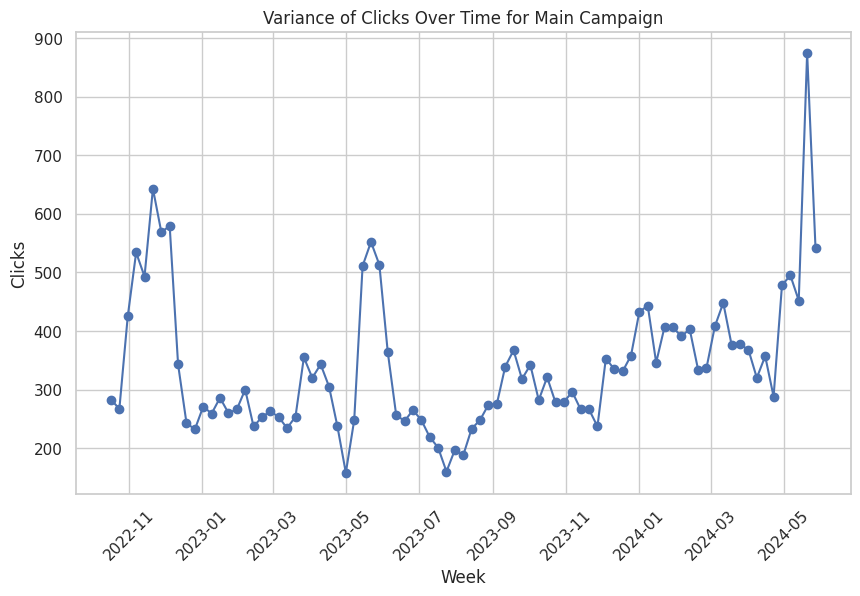

In [32]:
# Plot the variance of clicks over time
plt.figure(figsize=(10, 6))
plt.plot(B_main['Week'], B_main['Clicks'], marker='o')
plt.title('Variance of Clicks Over Time for Main Campaign')
plt.xlabel('Week')
plt.ylabel('Clicks')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

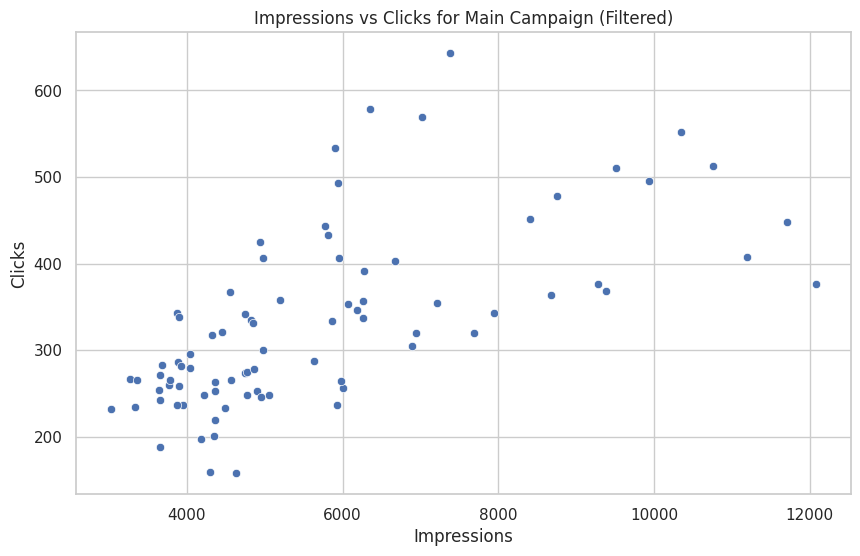

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt


# Define a threshold for abnormal values in Impressions
threshold = 20000

# Filter out the rows where Impressions are greater than the threshold
filtered_data = B_main[B_main['Impr.'] < threshold]

# Scatter plot for impressions vs clicks after removing abnormal values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Impr.', y='Clicks', data=filtered_data)
plt.title('Impressions vs Clicks for Main Campaign (Filtered)')
plt.xlabel('Impressions')
plt.ylabel('Clicks')
plt.grid(True)
plt.show()


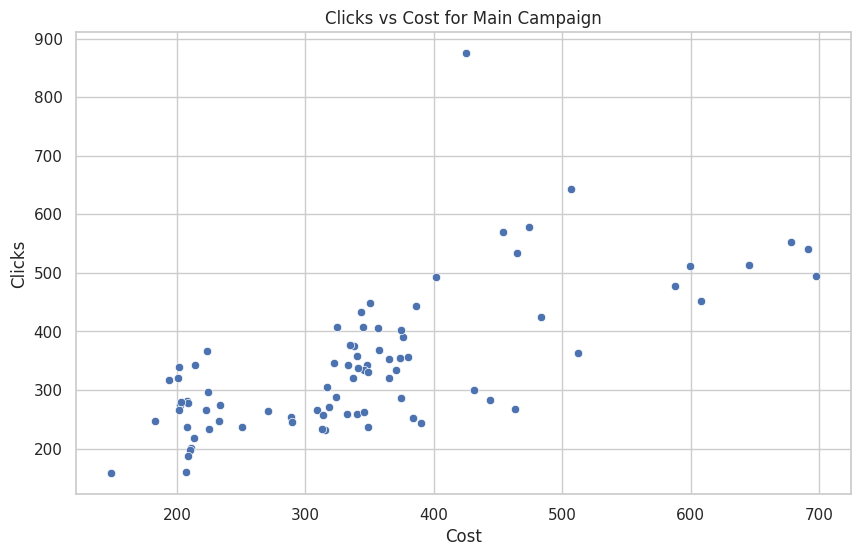

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a threshold for abnormal values in Cost
threshold = 10000

# Filter out the rows where Cost is greater than the threshold
filtered_data = B_main[B_main['Cost'] < threshold]

# Scatter plot for clicks vs cost after removing abnormal values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cost', y='Clicks', data=filtered_data)
plt.title('Clicks vs Cost for Main Campaign')
plt.xlabel('Cost')
plt.ylabel('Clicks')
plt.grid(True)
plt.show()


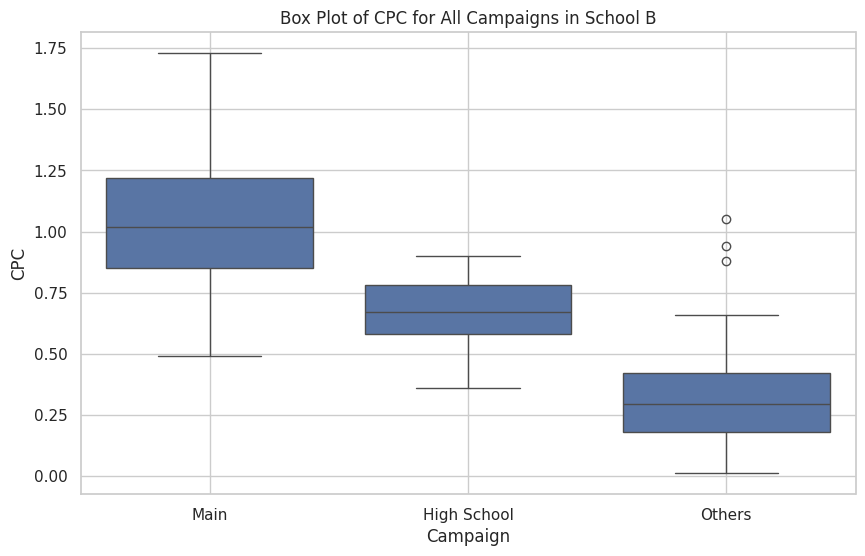

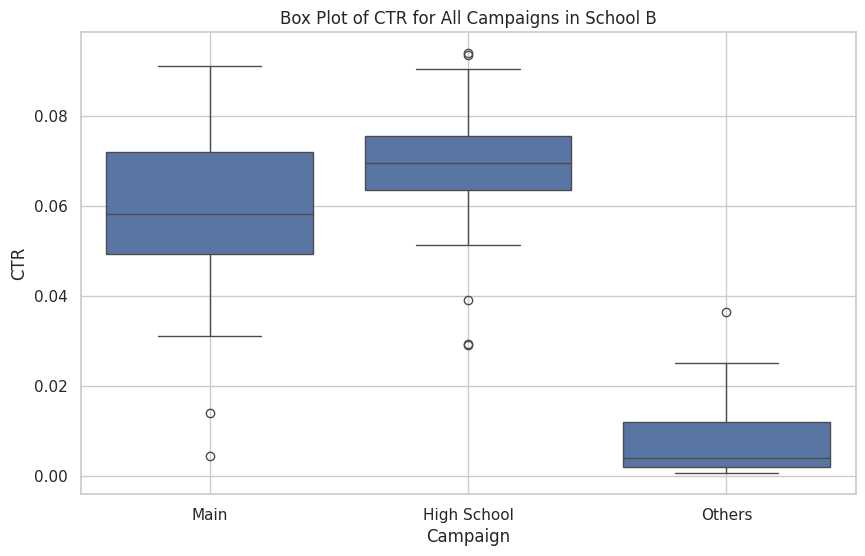

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the dataframes for School B into one dataframe
B_main['Campaign'] = 'Main'
B_highschool['Campaign'] = 'High School'
B_others['Campaign'] = 'Others'

combined_B_df = pd.concat([B_main, B_highschool, B_others])

# Create the box plots for CPC
plt.figure(figsize=(10, 6))
sns.boxplot(x='Campaign', y='Avg. CPC', data=combined_B_df)
plt.title('Box Plot of CPC for All Campaigns in School B')
plt.xlabel('Campaign')
plt.ylabel('CPC')
plt.grid(True)
plt.show()

# Create the box plots for CTR
plt.figure(figsize=(10, 6))
sns.boxplot(x='Campaign', y='CTR', data=combined_B_df)
plt.title('Box Plot of CTR for All Campaigns in School B')
plt.xlabel('Campaign')
plt.ylabel('CTR')
plt.grid(True)
plt.show()


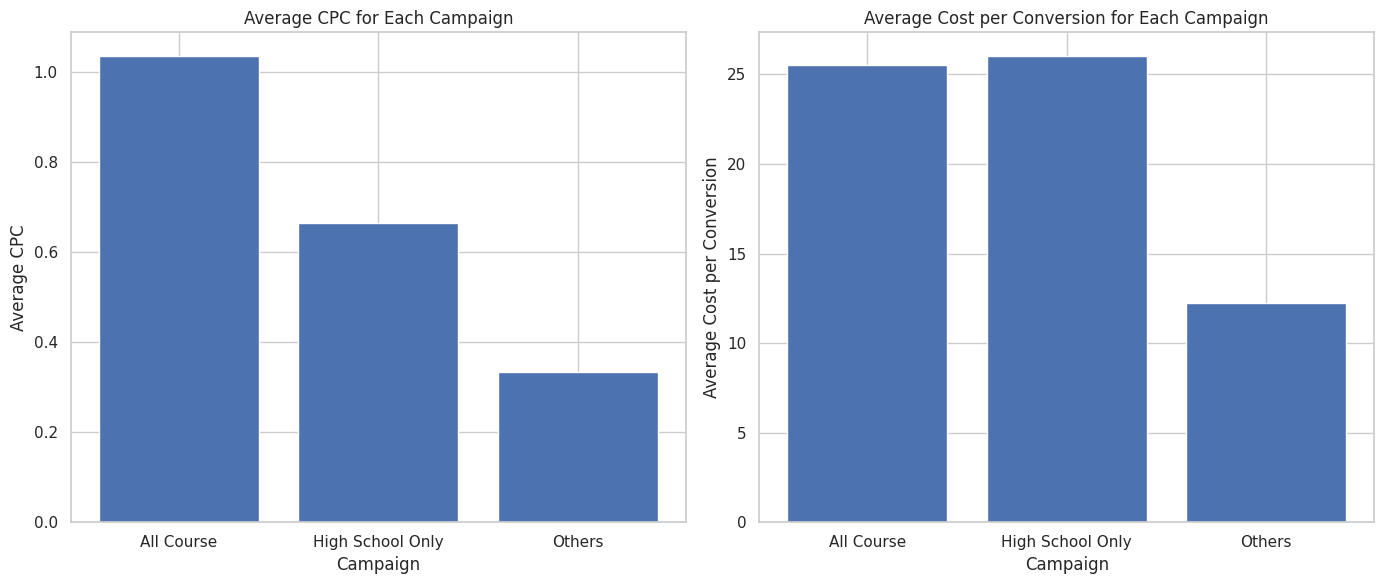

In [46]:
# Calculate average CPC for each campaign
average_cpc_b = {
    'All Course': B_main['Avg. CPC'].mean(),
    'High School Only': B_highschool['Avg. CPC'].mean(),
    'Others': B_others['Avg. CPC'].mean()
}

# Calculate average cost per conversion for each campaign
total_cost_b = {
    'All Course': B_main['Cost'].sum(),
    'High School Only': B_highschool['Cost'].sum(),
    'Others': B_others['Cost'].sum()
}

total_conversions_b = {
    'All Course': B_main['Conversions'].sum(),
    'High School Only': B_highschool['Conversions'].sum(),
    'Others': B_others['Conversions'].sum()
}

average_cost_per_conv_b = {k: total_cost_b[k] / total_conversions_b[k] if total_conversions_b[k] != 0 else 0
                           for k in total_cost_b.keys()}

# Create a dataframe for plotting
df_b = pd.DataFrame({
    'Campaign': list(average_cpc_b.keys()),
    'Average CPC': list(average_cpc_b.values()),
    'Average Cost per Conversion': list(average_cost_per_conv_b.values())
})

# Plot the bar charts
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Average CPC bar chart
axes[0].bar(df_b['Campaign'], df_b['Average CPC'])
axes[0].set_title('Average CPC for Each Campaign')
axes[0].set_xlabel('Campaign')
axes[0].set_ylabel('Average CPC')

# Average Cost per Conversion bar chart
axes[1].bar(df_b['Campaign'], df_b['Average Cost per Conversion'])
axes[1].set_title('Average Cost per Conversion for Each Campaign')
axes[1].set_xlabel('Campaign')
axes[1].set_ylabel('Average Cost per Conversion')

plt.tight_layout()
plt.show()

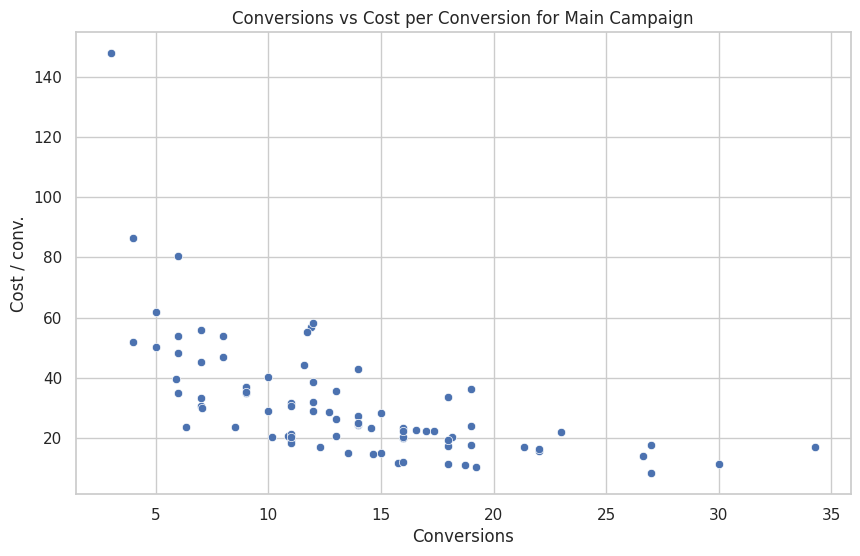

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Conversions', y='Cost / conv.', data=B_main)
plt.title('Conversions vs Cost per Conversion for Main Campaign')
plt.xlabel('Conversions')
plt.ylabel('Cost / conv.')
plt.grid(True)
plt.show()


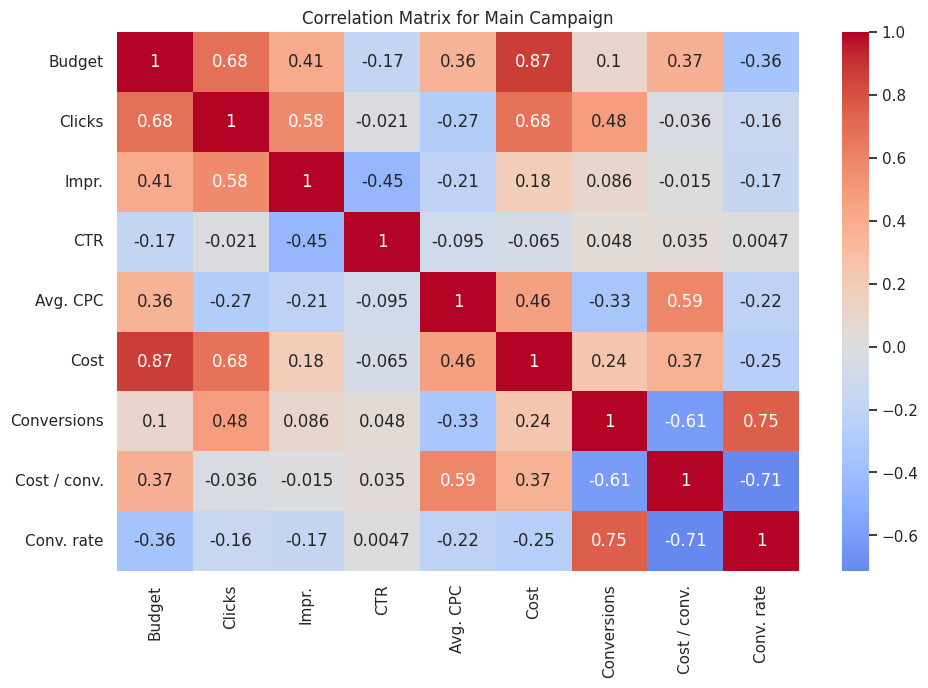

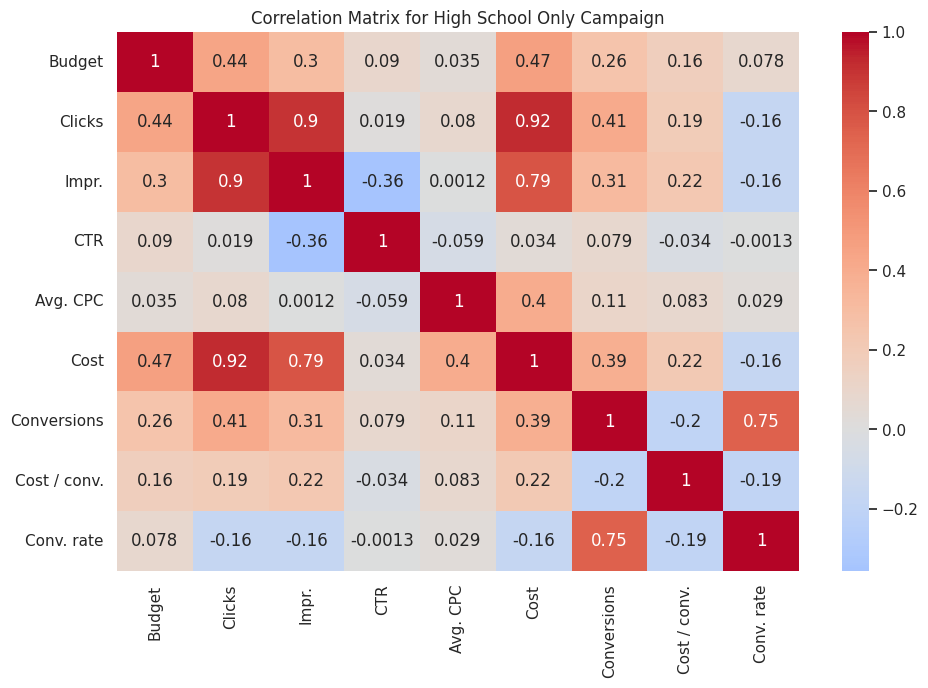

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt


# Correlation Matrix for Main Campaign
plt.figure(figsize=(11, 7))
corr_matrix_main = B_main.drop(columns=['Campaign', 'Week', 'Currency code']).corr()
sns.heatmap(corr_matrix_main, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for Main Campaign')
plt.show()

# Correlation Matrix for High School Only Campaign
plt.figure(figsize=(11, 7))
corr_matrix_highschool = B_highschool.drop(columns=['Campaign', 'Week', 'Currency code']).corr()
sns.heatmap(corr_matrix_highschool, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for High School Only Campaign')
plt.show()


In [17]:
data_a.head()

,Week,Clicks,Impr.,Cost,Conversions,Budget
0,2022-10-17,360,2881,464.06,1.0,65
1,2022-10-24,485,3174,457.97,11.0,65
2,2022-10-31,500,4120,460.76,4.0,65
3,2022-11-07,508,3962,481.64,13.0,65
4,2022-11-14,413,2802,431.26,3.0,65


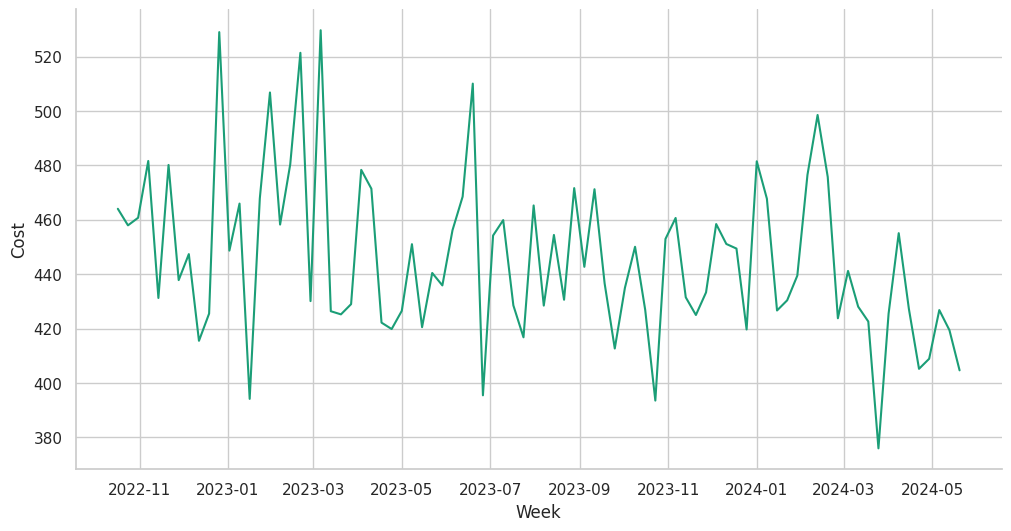

In [18]:
# @title Week vs Cost

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Week']
  ys = series['Cost']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data_a.sort_values('Week', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Week')
_ = plt.ylabel('Cost')

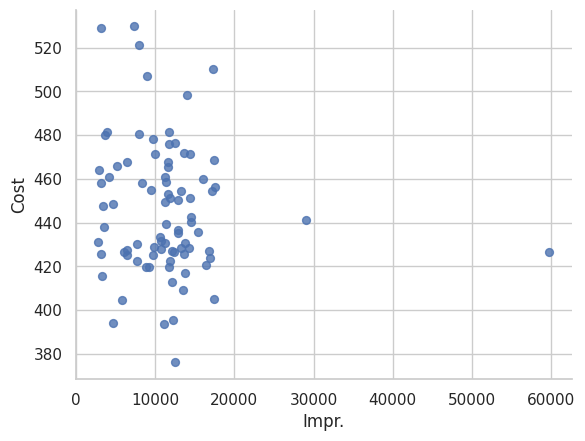

In [19]:
# @title Impr. vs Cost

from matplotlib import pyplot as plt
data_a.plot(kind='scatter', x='Impr.', y='Cost', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [20]:
data_b.head()

,Week,Budget,Clicks,Impr.,Cost,Conversions
0,2022-10-17,65,283,3678,443.33,3.0
1,2022-10-24,65,267,3269,463.10,12.0
2,2022-10-31,65,425,4934,483.25,6.0
3,2022-11-07,65,534,5908,465.03,13.0
4,2022-11-14,65,493,5938,401.97,10.0
